In [2]:
                                            #This project aims to build a multi-disease prediction model.
#Importing nessary libraries to the project

import pandas as pd  #Library to display the dataset in a table format and for analysis
import numpy as np
from sklearn.preprocessing import LabelEncoder  #convert the categorical values to numerical
import seaborn as sns
import matplotlib.pyplot as plt  #for matrix view
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,recall_score,f1_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc,roc_auc_score
import joblib


In [3]:
#Importing the dataset which already downloaed and added to the directory
ckd_data = pd.read_csv('Chronic-Kidney-Disease.csv')
diabetes_data = pd.read_csv('diabetes.csv')
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
heart_disease_data = pd.read_csv('HeartDiseaseTrain-Test.csv')

In [4]:
#Checking and reviewing(Exploring) the dataset details
print(ckd_data)
print(diabetes_data)
print(stroke_data)
print(heart_disease_data)

    age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0    48  80  1.020  1  0       ?    normal  notpresent  notpresent  121  ...   
1     7  50  1.020  4  0       ?    normal  notpresent  notpresent    ?  ...   
2    62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3    48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4    51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   
..   ..  ..    ... .. ..     ...       ...         ...         ...  ...  ...   
395  55  80  1.020  0  0  normal    normal  notpresent  notpresent  140  ...   
396  42  70  1.025  0  0  normal    normal  notpresent  notpresent   75  ...   
397  12  80  1.020  0  0  normal    normal  notpresent  notpresent  100  ...   
398  17  60  1.025  0  0  normal    normal  notpresent  notpresent  114  ...   
399  58  80  1.025  0  0  normal    normal  notpresent  notpresent  131  ...   

    pcv  wbcc rbcc  htn   dm cad appet 

In [5]:
#Display in a table
print('CKD Dataset')
display(ckd_data)
print('diabetes_data Dataset')
display(diabetes_data)
print('stroke_data Dataset')
display(stroke_data)
print('heart_disease_data Dataset')
display(heart_disease_data)

CKD Dataset


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


diabetes_data Dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


stroke_data Dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


heart_disease_data Dataset


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [6]:
#Explore first 5 Rows
print('CKD Dataset')
display(ckd_data.head())
print('diabetes_data Dataset')
display(diabetes_data.head())
print('stroke_data Dataset')
display(stroke_data.head())
print('heart_disease_data Dataset')
display(heart_disease_data.head())

# print('CKD Dataset')
# print(ckd_data.head())
# print('diabetes_data Dataset')
# print(diabetes_data.head())
# print('stroke_data Dataset')
# print(stroke_data.head())
# print('heart_disease_data Dataset')
# print(heart_disease_data.head())

CKD Dataset


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


diabetes_data Dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


stroke_data Dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


heart_disease_data Dataset


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [7]:
#Check the dataset values in the dataset
ckd_data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,43,90,46,3,3,3,3,3,3,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,106,131,251,261,364,317,323,339,250


In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
heart_disease_data.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [11]:
#Check for the null values in the dataset
print(ckd_data.isnull())
print(diabetes_data.isnull())
print(stroke_data.isnull())
print(heart_disease_data.isnull())

       age     bp     sg     al     su    rbc     pc    pcc     ba    bgr  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
395  False  False  False  False  False  False  False  False  False  False   
396  False  False  False  False  False  False  False  False  False  False   
397  False  False  False  False  False  False  False  False  False  False   
398  False  False  False  False  False  False  False  False  False  False   
399  False  False  False  False  False  False  False  False  False  False   

     ...    pcv   wbcc   rbcc    htn     dm    cad  appet     pe    ane  cl

In [12]:
#Check for the null values in the dataset
ckd_data.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [13]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
heart_disease_data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [16]:
#Replace the ? to N/A
ckd_data.replace(to_replace=['?', 'N/A', ''], value=np.nan, inplace=True)


In [17]:
display(ckd_data)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [18]:
ckd_data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [19]:
#handling the missing values with median values
stroke_data['bmi'].fillna(stroke_data['bmi'].median(), inplace=True)

C:\Users\danus\AppData\Local\Temp\ipykernel_23932\2620877885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_data['bmi'].fillna(stroke_data['bmi'].median(), inplace=True)


In [20]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
print('CKD Dataset')
display(ckd_data)
print('diabetes_data Dataset')
display(diabetes_data)
print('stroke_data Dataset')
display(stroke_data)
print('heart_disease_data Dataset')
display(heart_disease_data)

CKD Dataset


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


diabetes_data Dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


stroke_data Dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


heart_disease_data Dataset


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [22]:
#handle missing values with ? or N/A or '' 
ckd_data.replace(['?',' ','N/A'],np.nan,inplace=True)
diabetes_data.replace(['?',' ','N/A'],np.nan,inplace=True)
stroke_data.replace(['?',' ','N/A'],np.nan,inplace=True)
heart_disease_data.replace(['?',' ','N/A'],np.nan,inplace=True)

In [23]:
#change numerical values into median values ckd_data
num_col = ckd_data.select_dtypes(include=[np.number]).columns
for col in num_col:
    ckd_data[col].fillna(ckd_data[col].median(), inplace=True)

cat_col = ckd_data.select_dtypes(include=[object]).columns
for col2 in cat_col:
    ckd_data[col2] = ckd_data[col2].fillna(ckd_data[col2].mode()[0])

display(ckd_data)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,99,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [24]:
num_col = diabetes_data.select_dtypes(include=[np.number]).columns
for col in num_col:
    diabetes_data[col].fillna(diabetes_data[col].median(), inplace=True)

cat_col = diabetes_data.select_dtypes(include=[object]).columns
for col2 in cat_col:
    diabetes_data[col2].fillna(diabetes_data[col2].mode()[0],inplace=True)
display(diabetes_data)

C:\Users\danus\AppData\Local\Temp\ipykernel_23932\2204583677.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data[col].fillna(diabetes_data[col].median(), inplace=True)
C:\Users\danus\AppData\Local\Temp\ipykernel_23932\2204583677.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
num_col = stroke_data.select_dtypes(include=[np.number]).columns
for col in num_col:
    stroke_data[col].fillna(stroke_data[col].median(), inplace=True)

cat_col = stroke_data.select_dtypes(include=[object]).columns
for col2 in cat_col:
    stroke_data[col2].fillna(stroke_data[col2].mode()[0], inplace=True)

display(stroke_data)

C:\Users\danus\AppData\Local\Temp\ipykernel_23932\346568618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_data[col].fillna(stroke_data[col].median(), inplace=True)
C:\Users\danus\AppData\Local\Temp\ipykernel_23932\346568618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
num_col = heart_disease_data.select_dtypes(include=[np.number]).columns
for col in num_col:
    heart_disease_data[col].fillna(heart_disease_data[col].median(), inplace=True)

cat_col = heart_disease_data.select_dtypes(include=[object]).columns
for col2 in cat_col:
    heart_disease_data[col2].fillna(heart_disease_data[col2].mode()[0], inplace=True)

display(heart_disease_data)

C:\Users\danus\AppData\Local\Temp\ipykernel_23932\3012098746.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_disease_data[col].fillna(heart_disease_data[col].median(), inplace=True)
C:\Users\danus\AppData\Local\Temp\ipykernel_23932\3012098746.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [27]:
ckd_data.isnull().sum()
diabetes_data.isnull().sum()
stroke_data.isnull().sum()
heart_disease_data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [28]:
print('CKD Dataset')
display(ckd_data)
print('diabetes_data Dataset')
display(diabetes_data)
print('stroke_data Dataset')
display(stroke_data)
print('heart_disease_data Dataset')
display(heart_disease_data)

CKD Dataset


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,99,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


diabetes_data Dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


stroke_data Dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


heart_disease_data Dataset


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [29]:
#print columns name
print(ckd_data.columns)
print(diabetes_data.columns)
print(stroke_data.columns)
print(heart_disease_data.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


In [30]:
ckd_data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,76,10,5,6,6,2,2,2,2,146,...,42,89,45,2,2,2,2,2,2,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,99,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,28,128,153,245,339,353,324,358,378,54,...,92,117,149,253,263,366,318,324,340,250


In [31]:
#Removing the unwanted or fake values
ckd_data['age'] = pd.to_numeric(ckd_data['age'])
ckd_data['bp'] = pd.to_numeric(ckd_data['bp'])
ckd_data['bgr'] = pd.to_numeric(ckd_data['bgr'])

ckd_data = ckd_data[ckd_data['age'] > 0]
ckd_data = ckd_data[ckd_data['bp'] > 0]
ckd_data = ckd_data[ckd_data['bgr'] > 0]
print(ckd_data)


     age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0     48  80  1.020  1  0  normal    normal  notpresent  notpresent  121  ...   
1      7  50  1.020  4  0  normal    normal  notpresent  notpresent   99  ...   
2     62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3     48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4     51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   
..   ...  ..    ... .. ..     ...       ...         ...         ...  ...  ...   
395   55  80  1.020  0  0  normal    normal  notpresent  notpresent  140  ...   
396   42  70  1.025  0  0  normal    normal  notpresent  notpresent   75  ...   
397   12  80  1.020  0  0  normal    normal  notpresent  notpresent  100  ...   
398   17  60  1.025  0  0  normal    normal  notpresent  notpresent  114  ...   
399   58  80  1.025  0  0  normal    normal  notpresent  notpresent  131  ...   

    pcv  wbcc rbcc  htn   d

In [32]:
print(diabetes_data.columns)
diabetes_data['Age'] = pd.to_numeric(diabetes_data['Age'])
diabetes_data = diabetes_data[diabetes_data['Age'] > 0]

diabetes_data['Glucose'] = pd.to_numeric(diabetes_data['Glucose'])
diabetes_data['BloodPressure'] = pd.to_numeric(diabetes_data['BloodPressure'])

diabetes_data = diabetes_data[diabetes_data['Glucose'] > 0]
diabetes_data = diabetes_data[diabetes_data['BloodPressure'] > 0]

print(diabetes_data)



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93

In [33]:
print(stroke_data.columns)
stroke_data['age'] = pd.to_numeric(stroke_data['age'])
stroke_data = stroke_data[stroke_data['age'] > 0]

stroke_data['avg_glucose_level'] = pd.to_numeric(stroke_data['avg_glucose_level'])
stroke_data['bmi'] = pd.to_numeric(stroke_data['bmi'])

stroke_data = stroke_data[stroke_data['avg_glucose_level'] > 0]
stroke_data = stroke_data[stroke_data['bmi'] > 0]
print(stroke_data)



Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Fem

In [34]:
print(heart_disease_data.columns)
heart_disease_data = heart_disease_data[heart_disease_data['age'] > 0]
heart_disease_data['age'] = pd.to_numeric(heart_disease_data['age'])

heart_disease_data = heart_disease_data[heart_disease_data['resting_blood_pressure'] > 0]
heart_disease_data['resting_blood_pressure'] = pd.to_numeric(heart_disease_data['resting_blood_pressure'])

heart_disease_data = heart_disease_data[heart_disease_data['cholestoral'] > 0]
heart_disease_data['cholestoral'] = pd.to_numeric(heart_disease_data['cholestoral'])

heart_disease_data = heart_disease_data[heart_disease_data['Max_heart_rate'] > 0]
heart_disease_data['Max_heart_rate'] = pd.to_numeric(heart_disease_data['Max_heart_rate'])

print(heart_disease_data)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')
      age     sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0      52    Male   Typical angina                     125          212   
1      53    Male   Typical angina                     140          203   
2      70    Male   Typical angina                     145          174   
3      61    Male   Typical angina                     148          203   
4      62  Female   Typical angina                     138          294   
...   ...     ...              ...                     ...          ...   
1020   59    Male  Atypical angina                     140          221   
1021   60    Male   Typical angina                     125          258   
1022   47    Male   Typical angina        

In [35]:
print(ckd_data.columns)
print(diabetes_data.columns)
print(stroke_data.columns)
print(heart_disease_data.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


In [36]:
#Remove the id columns which dont need for the prediction
stroke_data.drop(columns=['id'],inplace=True)
print(stroke_data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [37]:
#Check the data types
print("ckd_dataset\n\n",ckd_data.dtypes)
print("\ndiabetes_data\n\n",diabetes_data.dtypes)
print("\nstroke_data\n\n",stroke_data.dtypes)
print("\nheart_disease_data\n\n",heart_disease_data.dtypes)

ckd_dataset

 age       int64
bp        int64
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr       int64
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

diabetes_data

 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

stroke_data

 gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object

In [38]:
#converting the Object to numeric values
#ckd_dataset
ckd_data['sg'] = pd.to_numeric(ckd_data['sg'],errors='coerce')
ckd_data['al'] = pd.to_numeric(ckd_data['al'],errors='coerce')
ckd_data['su'] = pd.to_numeric(ckd_data['su'],errors='coerce')
ckd_data['bu'] = pd.to_numeric(ckd_data['bu'],errors='coerce')
ckd_data['sc'] = pd.to_numeric(ckd_data['sc'],errors='coerce')
ckd_data['sod'] = pd.to_numeric(ckd_data['sod'],errors='coerce')
ckd_data['pot'] = pd.to_numeric(ckd_data['pot'],errors='coerce')
ckd_data['hemo'] = pd.to_numeric(ckd_data['hemo'],errors='coerce')
ckd_data['pcv'] = pd.to_numeric(ckd_data['pcv'],errors='coerce')
ckd_data['wbcc'] = pd.to_numeric(ckd_data['wbcc'],errors='coerce')
ckd_data['rbcc'] = pd.to_numeric(ckd_data['rbcc'],errors='coerce')

print("ckd_dataset\n\n",ckd_data.dtypes)

ckd_dataset

 age        int64
bp         int64
sg       float64
al         int64
su         int64
rbc       object
pc        object
pcc       object
ba        object
bgr        int64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int64
wbcc       int64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object


In [39]:
# Converting dataset values into numeric values cate to numeric

#create an array of the columns need to convert
cat_col = ['htn','dm','cad','appet','pe','ane','class','rbc','pc','pcc','ba']

label_encoder = LabelEncoder()
for col in cat_col:
    ckd_data[col] = label_encoder.fit_transform(ckd_data[col])

display(ckd_data)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.2,1,1,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,99,...,38,6000,5.2,0,0,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,5.2,0,1,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,0,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,1,1,0,0,140,...,47,6700,4.9,0,0,0,0,0,0,1
396,42,70,1.025,0,0,1,1,0,0,75,...,54,7800,6.2,0,0,0,0,0,0,1
397,12,80,1.020,0,0,1,1,0,0,100,...,49,6600,5.4,0,0,0,0,0,0,1
398,17,60,1.025,0,0,1,1,0,0,114,...,51,7200,5.9,0,0,0,0,0,0,1


In [40]:
#print one row values
print(ckd_data.iloc[399])

age        58.000
bp         80.000
sg          1.025
al          0.000
su          0.000
rbc         1.000
pc          1.000
pcc         0.000
ba          0.000
bgr       131.000
bu         18.000
sc          1.100
sod       141.000
pot         3.500
hemo       15.800
pcv        53.000
wbcc     6800.000
rbcc        6.100
htn         0.000
dm          0.000
cad         0.000
appet       0.000
pe          0.000
ane         0.000
class       1.000
Name: 399, dtype: float64


In [41]:

print("\nstroke_data\n\n",stroke_data.dtypes)



stroke_data

 gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [42]:
cat_col = ['gender','ever_married','work_type','Residence_type','smoking_status']

label_encoder = LabelEncoder()
for col in cat_col:
    stroke_data[col] = label_encoder.fit_transform(stroke_data[col])

display(stroke_data)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [43]:

print("\nheart_disease_data\n\n",heart_disease_data.dtypes)


heart_disease_data

 age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object


In [44]:
cat_col = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','slope','vessels_colored_by_flourosopy','thalassemia']

label_encoder = LabelEncoder()
for col in cat_col:
    heart_disease_data[col] = label_encoder.fit_transform(heart_disease_data[col])

display(heart_disease_data)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,2,164,1,0.0,0,4,0,1
1021,60,1,3,125,258,1,1,141,1,2.8,1,1,3,0
1022,47,1,3,110,275,1,1,118,1,1.0,1,1,0,0
1023,50,0,3,110,254,1,1,159,0,0.0,0,4,0,1


In [45]:
print("\nheart_disease_data\n\n",heart_disease_data.dtypes)


heart_disease_data

 age                                int64
sex                                int64
chest_pain_type                    int64
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar                int64
rest_ecg                           int64
Max_heart_rate                     int64
exercise_induced_angina            int64
oldpeak                          float64
slope                              int64
vessels_colored_by_flourosopy      int64
thalassemia                        int64
target                             int64
dtype: object


In [46]:
print('CKD Dataset')
display(ckd_data.isnull().sum())
print('\ndiabetes_data Dataset')
display(diabetes_data.isnull().sum())
print('\nstroke_data Dataset')
display(stroke_data.isnull().sum())
print('\nheart_disease_data Dataset')
display(heart_disease_data.isnull().sum())


CKD Dataset


age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


diabetes_data Dataset


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


stroke_data Dataset


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


heart_disease_data Dataset


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

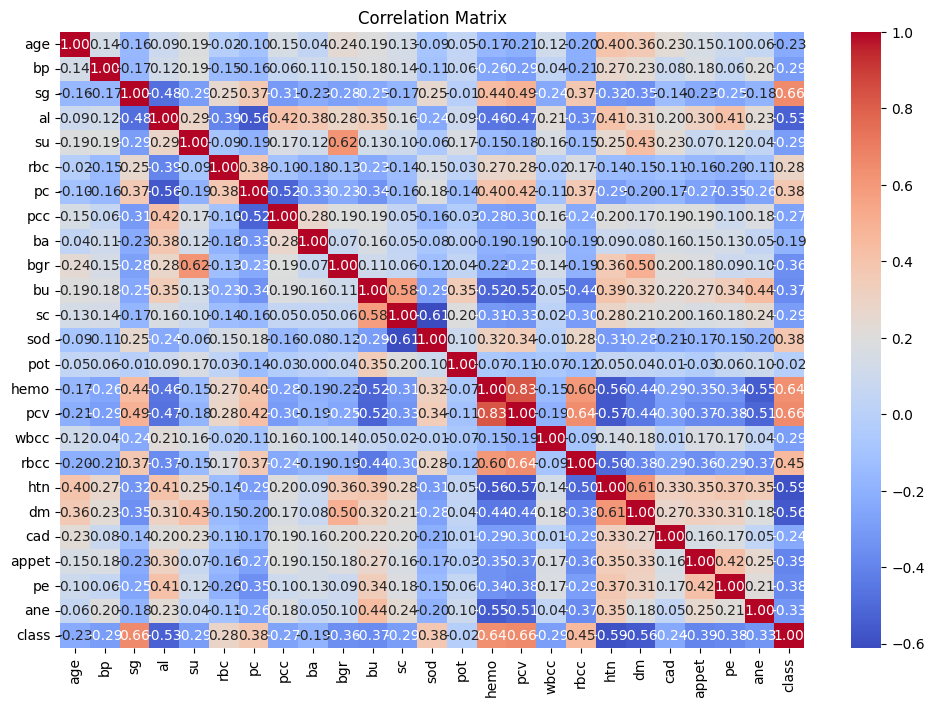

In [47]:
#Feature selection

#Correlation matrix
corr_mat = ckd_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

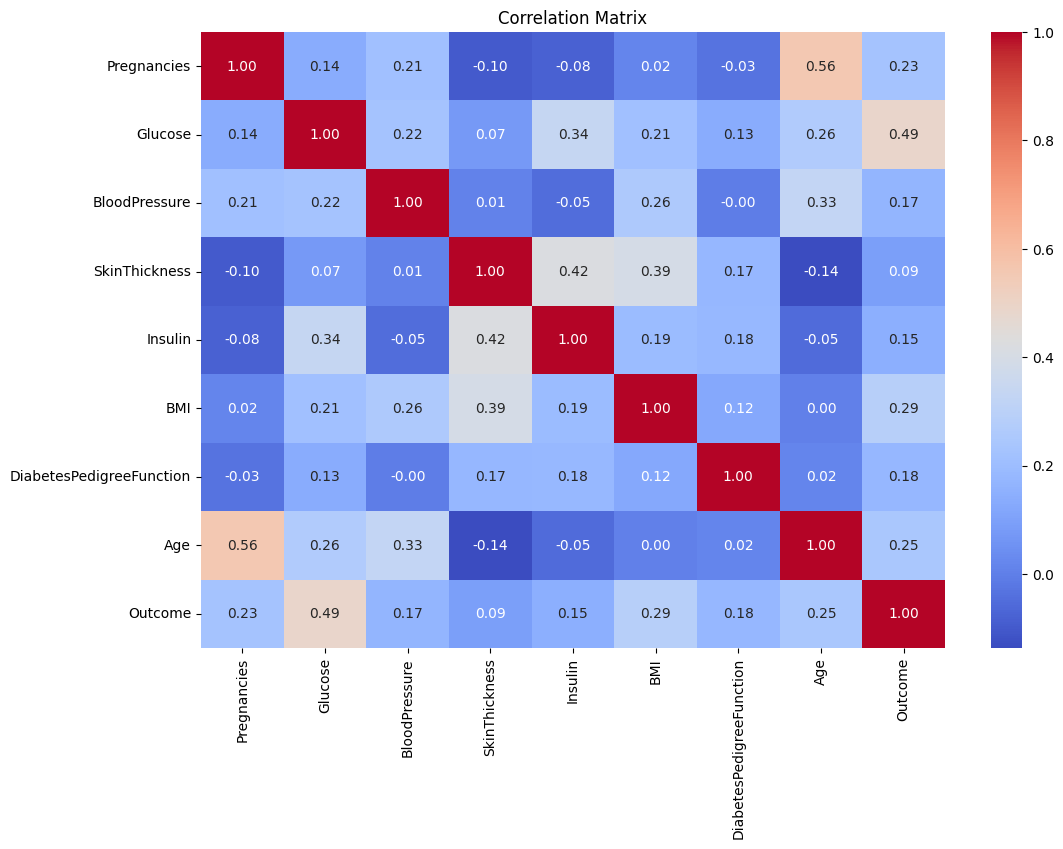

In [48]:
#Correlation matrix
corr_mat = diabetes_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

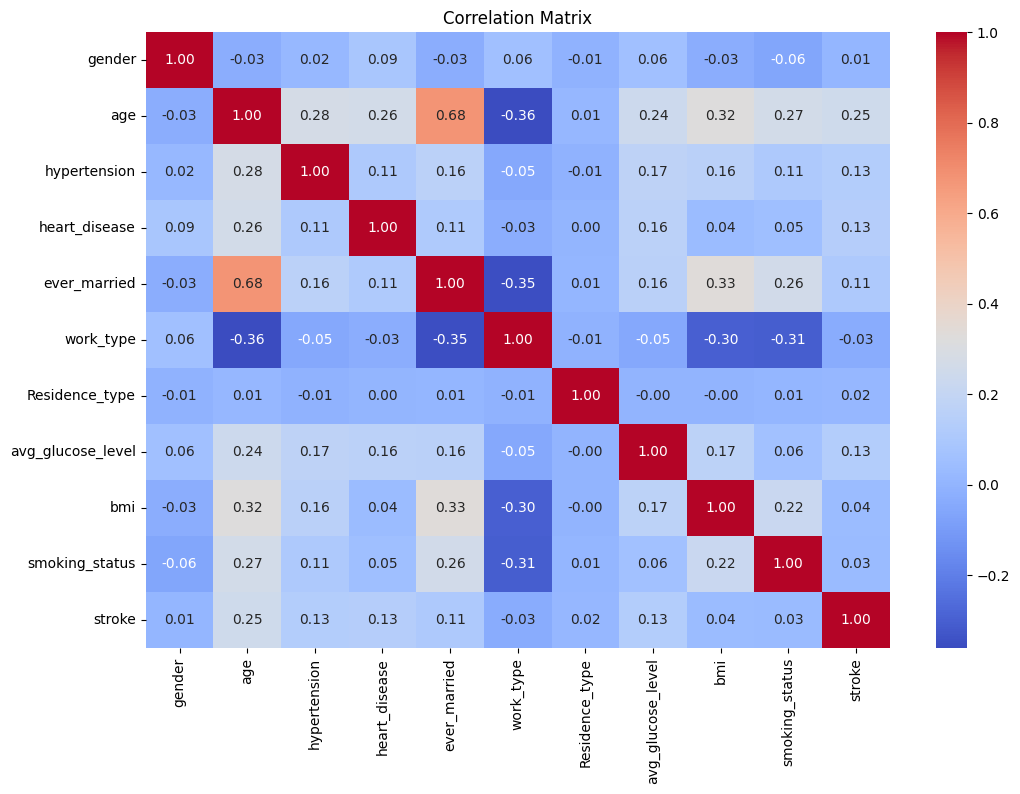

In [49]:
#Correlation matrix
corr_mat = stroke_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

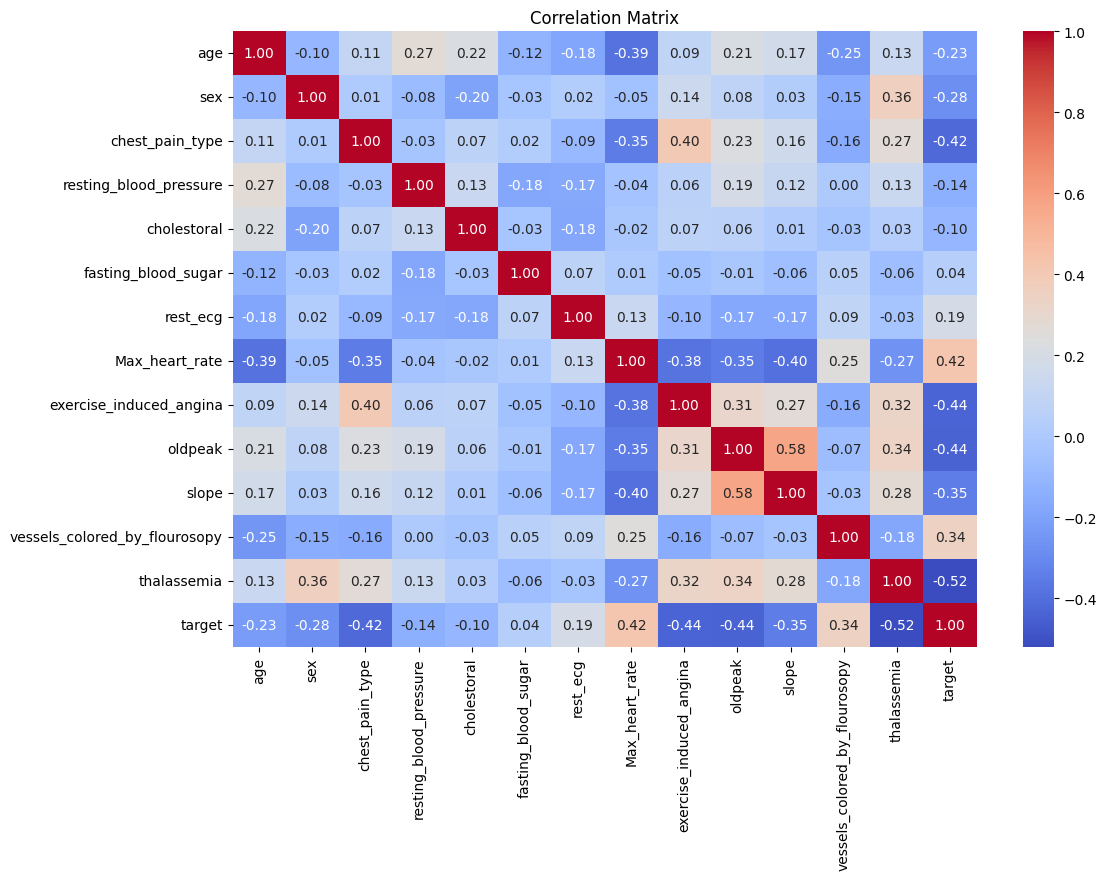

In [50]:
#Correlation matrix
corr_mat = heart_disease_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [51]:
#performe feature selection..............

X_ckd = ckd_data.drop('class',axis=1)
y_ckd = ckd_data['class']

#Training the Random forest to find the best features order
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_ckd,y_ckd)

feature_importance = rf.feature_importances_

feature = pd.DataFrame({'Feature':X_ckd.columns, 'Importance':feature_importance})
feature = feature.sort_values(by='Importance', ascending=False)

print(feature)

   Feature  Importance
11      sc    0.182083
15     pcv    0.159476
2       sg    0.134779
14    hemo    0.100270
3       al    0.079333
19      dm    0.054513
18     htn    0.053952
17    rbcc    0.047310
12     sod    0.037970
10      bu    0.031176
9      bgr    0.028224
16    wbcc    0.022384
13     pot    0.013274
1       bp    0.010929
21   appet    0.010374
0      age    0.008278
4       su    0.007693
22      pe    0.006806
6       pc    0.005691
23     ane    0.003199
5      rbc    0.001736
8       ba    0.000284
20     cad    0.000166
7      pcc    0.000099


In [52]:
#Training the ckd dataset with 80% , 20%

X_train_ckd, X_test_ckd, y_train_ckd, y_test_ckd = train_test_split(X_ckd, y_ckd, test_size=0.2, random_state=42)

In [53]:
#performe feature selection..............

X_dia = diabetes_data.drop('Outcome',axis=1)
y_dia = diabetes_data['Outcome']

#Training the Random forest to find the best features order
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_dia,y_dia)

feature_importance = rf.feature_importances_

feature = pd.DataFrame({'Feature':X_dia.columns, 'Importance':feature_importance})
feature = feature.sort_values(by='Importance', ascending=False)

print(feature)

                    Feature  Importance
1                   Glucose    0.264276
5                       BMI    0.159672
7                       Age    0.130712
6  DiabetesPedigreeFunction    0.125772
0               Pregnancies    0.087488
2             BloodPressure    0.086306
4                   Insulin    0.077347
3             SkinThickness    0.068425


In [54]:
#Training the diabetes_data dataset with 80% , 20%
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_dia, y_dia, test_size=0.2, random_state=42)

In [55]:
#performe feature selection..............

X_str = stroke_data.drop('stroke',axis=1)
y_str = stroke_data['stroke']

#Training the Random forest to find the best features order
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_str,y_str)

feature_importance = rf.feature_importances_

feature = pd.DataFrame({'Feature':X_str.columns, 'Importance':feature_importance})
feature = feature.sort_values(by='Importance', ascending=False)

print(feature)

             Feature  Importance
7  avg_glucose_level    0.286415
8                bmi    0.235914
1                age    0.231360
9     smoking_status    0.065541
5          work_type    0.049736
6     Residence_type    0.033610
0             gender    0.032888
2       hypertension    0.025455
3      heart_disease    0.021748
4       ever_married    0.017333


In [56]:
#Training the stroke_data dataset with 80% , 20%
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X_str, y_str, test_size=0.2, random_state=42)

In [57]:
#performe feature selection..............

X_heart = heart_disease_data.drop('target',axis=1)
y_heart = heart_disease_data['target']

#Training the Random forest to find the best features order
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_heart,y_heart)

feature_importance = rf.feature_importances_

feature = pd.DataFrame({'Feature':X_heart.columns, 'Importance':feature_importance})
feature = feature.sort_values(by='Importance', ascending=False)

print(feature)

                          Feature  Importance
2                 chest_pain_type    0.141451
7                  Max_heart_rate    0.118862
9                         oldpeak    0.115788
11  vessels_colored_by_flourosopy    0.113749
12                    thalassemia    0.110750
0                             age    0.089222
4                     cholestoral    0.082784
3          resting_blood_pressure    0.073079
8         exercise_induced_angina    0.049904
10                          slope    0.044022
1                             sex    0.030820
6                        rest_ecg    0.019838
5             fasting_blood_sugar    0.009732


In [58]:
#Training the heart_disease_data dataset with 80% , 20%
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

In [59]:
#Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ckd)
X_test_scaled = scaler.fit_transform(X_test_ckd)

In [60]:
#1.Logistic Regression algorithm
ckd_model = LogisticRegression(max_iter=2000)


In [61]:
ckd_model.fit(X_train_scaled,y_train_ckd)

LogisticRegression(max_iter=2000)

In [62]:
ckd_pred = ckd_model.predict(X_test_scaled)
print(ckd_pred)

[1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 1]


In [63]:
#Dia dataset
#Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dia)
X_test_scaled = scaler.fit_transform(X_test_dia)

#1.Logistic Regression algorithm
dia_model = LogisticRegression(max_iter=2000)

dia_model.fit(X_train_scaled,y_train_dia)

LogisticRegression(max_iter=2000)

In [64]:
dia_pred = dia_model.predict(X_test_scaled)
print(dia_pred)

[1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


In [65]:
#stroke_data dataset
#Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_str)
X_test_scaled = scaler.fit_transform(X_test_str)

#1.Logistic Regression algorithm
str_model = LogisticRegression(max_iter=2000)

str_model.fit(X_train_scaled,y_train_str)

LogisticRegression(max_iter=2000)

In [66]:
str_pred = str_model.predict(X_test_scaled)
print(str_pred)

[0 0 0 ... 0 0 0]


In [67]:
#heart_disease_data dataset
#Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_heart)
X_test_scaled = scaler.fit_transform(X_test_heart)

#1.Logistic Regression algorithm
heart_model = LogisticRegression(max_iter=2000)

heart_model.fit(X_train_scaled,y_train_heart)

LogisticRegression(max_iter=2000)

In [68]:
heart_pred = heart_model.predict(X_test_scaled)
print(heart_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1
 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0]


In [69]:
#2.RandomForestClassifier 
ckd_Random_model = RandomForestClassifier()
ckd_Random_model.fit(X_train_ckd,y_train_ckd)

RandomForestClassifier()

In [70]:
ckd_Random_pred = ckd_Random_model.predict(X_test_ckd)
print(ckd_Random_pred)

[0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 1]


In [71]:
#2.RandomForestClassifier 
dia_Random_model = RandomForestClassifier()
dia_Random_model.fit(X_train_dia,y_train_dia)

RandomForestClassifier()

In [72]:
dia_Random_pred = dia_Random_model.predict(X_test_dia)
print(dia_Random_pred)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0]


In [73]:
#2.RandomForestClassifier 
str_Random_model = RandomForestClassifier()
str_Random_model.fit(X_train_str,y_train_str)

RandomForestClassifier()

In [74]:
str_Random_pred = str_Random_model.predict(X_test_str)
print(str_Random_pred)

[0 0 0 ... 0 0 0]


In [75]:
#2.RandomForestClassifier 
heart_Random_model = RandomForestClassifier()
heart_Random_model.fit(X_train_heart,y_train_heart)

RandomForestClassifier()

In [76]:
heart_Random_pred = heart_Random_model.predict(X_test_heart)
print(heart_Random_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [77]:
#3.Decision Tree
ckd_tree_model = DecisionTreeClassifier()
ckd_tree_model.fit(X_train_ckd,y_train_ckd)

DecisionTreeClassifier()

In [78]:
ckd_tree_pred = ckd_tree_model.predict(X_test_ckd)
print(ckd_tree_pred)

[0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 1]


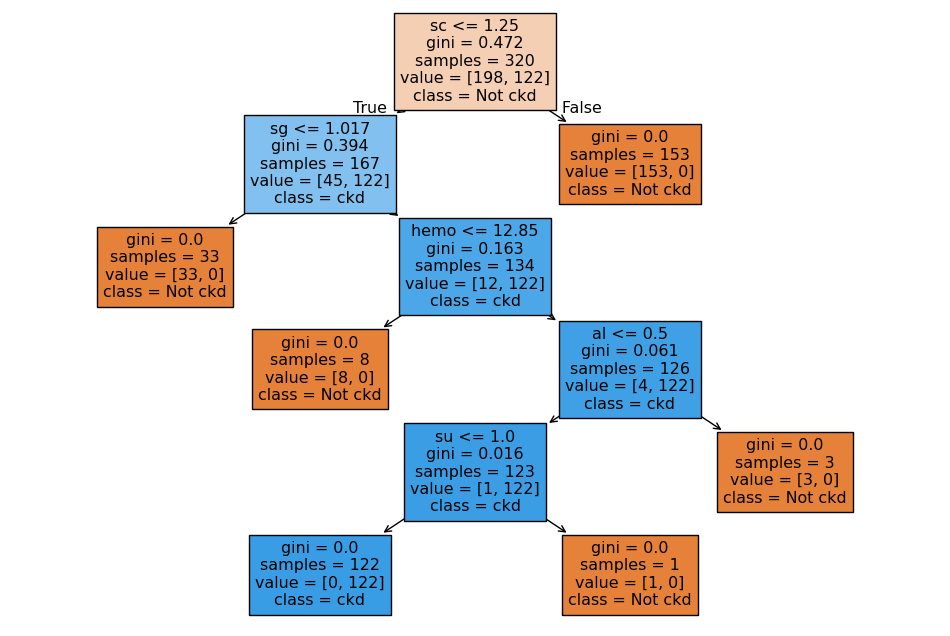

In [79]:
#draw the tree
plt.figure(figsize=(12,8))
plot_tree(ckd_tree_model,feature_names=X_train_ckd.columns, class_names=['Not ckd','ckd'],filled=True)
plt.show()

In [80]:
dia_tree_model = DecisionTreeClassifier()
dia_tree_model.fit(X_train_dia,y_train_dia)

DecisionTreeClassifier()

In [81]:
dia_tree_pred = dia_tree_model.predict(X_test_dia)
print(dia_tree_pred)

[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0]


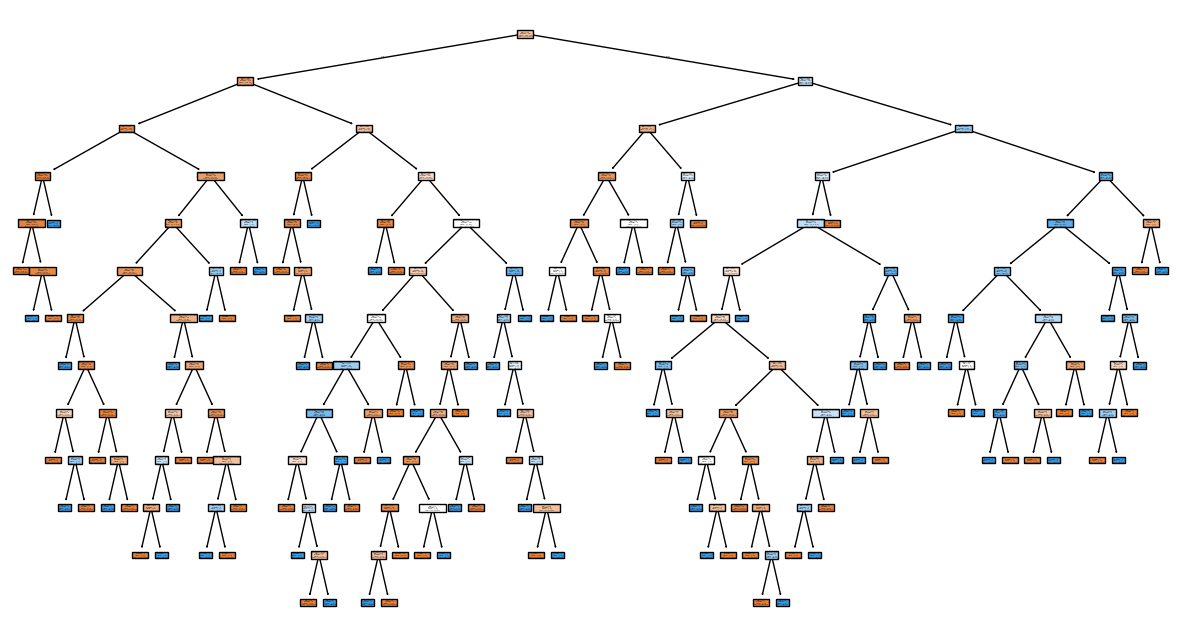

In [82]:
#draw the tree
plt.figure(figsize=(15,8))
plot_tree(dia_tree_model,feature_names=X_train_dia.columns, class_names=['Not diabetics','diabetics'],filled=True)
plt.show()

In [83]:
str_tree_model = DecisionTreeClassifier()
str_tree_model.fit(X_train_str,y_train_str)

DecisionTreeClassifier()

In [84]:
str_tree_pred = str_tree_model.predict(X_test_str)
print(str_tree_pred)

[0 0 0 ... 0 0 0]


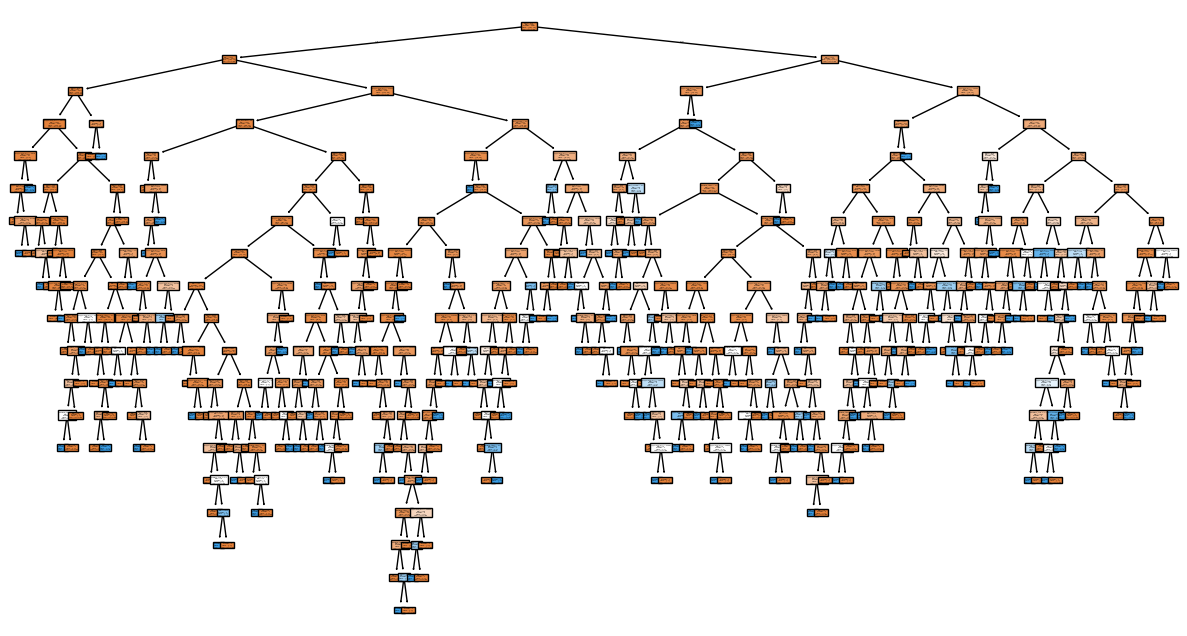

In [85]:
#draw the tree
plt.figure(figsize=(15,8))
plot_tree(str_tree_model,feature_names=X_train_str.columns, class_names=['Not Stroke','Stroke'],filled=True)
plt.show()

In [86]:
heart_tree_model = DecisionTreeClassifier()
heart_tree_model.fit(X_train_heart,y_train_heart)

DecisionTreeClassifier()

In [87]:
heart_tree_pred = heart_tree_model.predict(X_test_heart)
print(heart_tree_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


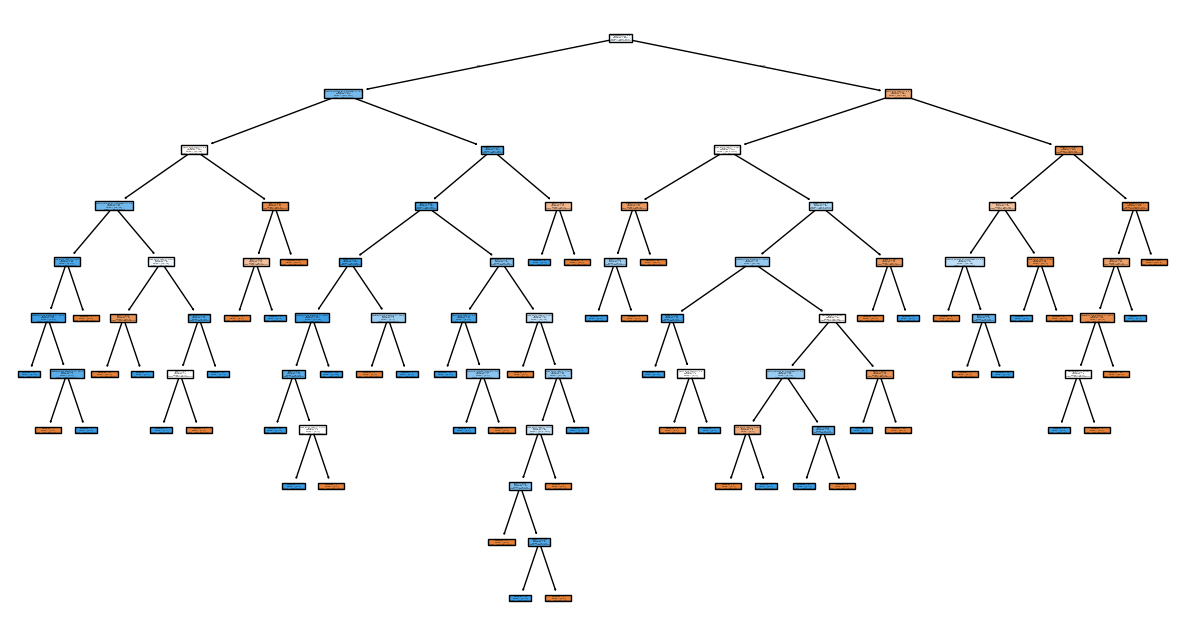

In [88]:
#draw the tree
plt.figure(figsize=(15,8))
plot_tree(heart_tree_model,feature_names=X_train_heart.columns, class_names=['Not heart Disease','heart Disease'],filled=True)
plt.show()

In [89]:
#4.KNN

ckd_KNN_model = KNeighborsClassifier()
ckd_KNN_model.fit(X_train_ckd,y_train_ckd)

KNeighborsClassifier()

In [90]:
ckd_KNN_pred = ckd_KNN_model.predict(X_test_ckd)
print(ckd_KNN_pred)

[1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 0 1]


In [91]:
dia_KNN_model = KNeighborsClassifier()
dia_KNN_model.fit(X_train_dia,y_train_dia)

KNeighborsClassifier()

In [92]:
dia_KNN_pred = dia_KNN_model.predict(X_test_dia)
print(dia_KNN_pred)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0]


In [93]:
str_KNN_model = KNeighborsClassifier()
str_KNN_model.fit(X_train_str,y_train_str)


KNeighborsClassifier()

In [94]:
str_KNN_pred = str_KNN_model.predict(X_test_str)
print(str_KNN_pred)

[0 0 0 ... 0 0 0]


In [95]:
heart_KNN_model = KNeighborsClassifier()
heart_KNN_model.fit(X_train_heart,y_train_heart)


KNeighborsClassifier()

In [96]:
heart_KNN_pred = heart_KNN_model.predict(X_test_heart)
print(heart_KNN_pred)

[1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


In [97]:
#5.SVM

ckd_svm_model = SVC(kernel = 'linear',C=1.0,random_state=42)
ckd_svm_model.fit(X_train_ckd,y_train_ckd)


SVC(kernel='linear', random_state=42)

In [98]:
ckd_svm_pred = ckd_svm_model.predict(X_test_ckd)
print(ckd_svm_pred)

[0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 1]


In [99]:
dia_svm_model = SVC(kernel = 'linear',C=1.0,random_state=42)
dia_svm_model.fit(X_train_dia,y_train_dia)


SVC(kernel='linear', random_state=42)

In [100]:
dia_svm_pred = dia_svm_model.predict(X_test_dia)
print(dia_svm_pred)

[1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


In [101]:
str_svm_model = SVC(kernel = 'linear',C=1.0,random_state=42)
str_svm_model.fit(X_train_str,y_train_str)


SVC(kernel='linear', random_state=42)

In [102]:
str_svm_pred = str_svm_model.predict(X_test_str)
print(str_svm_pred)

[0 0 0 ... 0 0 0]


In [103]:
heart_svm_model = SVC(kernel = 'linear',C=1.0,random_state=42)
heart_svm_model.fit(X_train_heart,y_train_heart)


SVC(kernel='linear', random_state=42)

In [104]:

heart_svm_pred = heart_svm_model.predict(X_test_heart)
print(heart_svm_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1
 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0]


ckd LogisticRegression Model Accuracy:  0.987500
ckd RandomForest Model Accuracy:  1.000000
ckd DecisionTree Model Accuracy:  1.000000
ckd KNN Model Accuracy:  0.712500
ckd SVM Model Accuracy:  0.987500

ckd LogisticRegression Model Precision:  0.965517
ckd RandomForest Model Precision:  1.000000
ckd DecisionTree Model Precision:  1.000000
ckd KNN Model Precision:  0.553191
ckd SVM Model Precision:  1.000000

ckd LogisticRegression Model recall:  1.000000
ckd RandomForest Model recall:  1.000000
ckd DecisionTree Model recall:  1.000000
ckd KNN Model recall:  0.928571
ckd SVM Model recall:  0.964286

ckd LogisticRegression Model f1_score:  0.982456
ckd RandomForest Model f1_score:  1.000000
ckd DecisionTree Model f1_score:  1.000000
ckd KNN Model f1_score:  0.693333
ckd SVM Model f1_score:  0.981818

LogisticRegression AUC: 0.5
RandomForest AUC: 1.0
Decision Tree AUC: 1.0
KNN AUC: 0.8118131868131868


ckd LogisticRegression Model confusion_matrix:
[[51  1]
 [ 0 28]]


d:\ML_course_work\Flask_deployemet\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


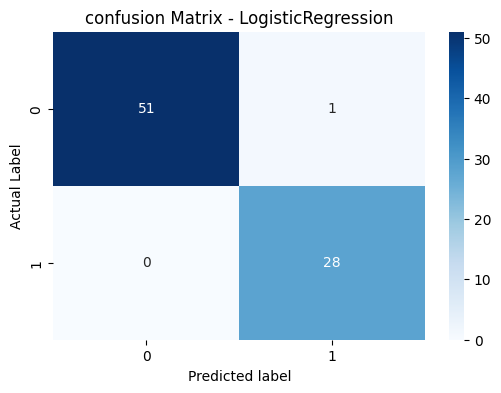

ckd RandomForest Model confusion_matrix:
[[52  0]
 [ 0 28]]
ckd DecisionTree Model confusion_matrix:
[[52  0]
 [ 0 28]]
ckd KNN Model confusion_matrix:
[[31 21]
 [ 2 26]]
ckd SVM Model confusion_matrix:

[[52  0]
 [ 1 27]]


In [105]:
#calculating model accuracy and other

print(f"ckd LogisticRegression Model Accuracy: {accuracy_score(y_test_ckd,ckd_pred) : 2f}")
print(f"ckd RandomForest Model Accuracy: {accuracy_score(y_test_ckd,ckd_Random_pred) : 2f}")
print(f"ckd DecisionTree Model Accuracy: {accuracy_score(y_test_ckd,ckd_tree_pred) : 2f}")
print(f"ckd KNN Model Accuracy: {accuracy_score(y_test_ckd,ckd_KNN_pred) : 2f}")
print(f"ckd SVM Model Accuracy: {accuracy_score(y_test_ckd,ckd_svm_pred) : 2f}\n")

print(f"ckd LogisticRegression Model Precision: {precision_score(y_test_ckd,ckd_pred) : 2f}")
print(f"ckd RandomForest Model Precision: {precision_score(y_test_ckd,ckd_Random_pred) : 2f}")
print(f"ckd DecisionTree Model Precision: {precision_score(y_test_ckd,ckd_tree_pred) : 2f}")
print(f"ckd KNN Model Precision: {precision_score(y_test_ckd,ckd_KNN_pred) : 2f}")
print(f"ckd SVM Model Precision: {precision_score(y_test_ckd,ckd_svm_pred) : 2f}\n")

print(f"ckd LogisticRegression Model recall: {recall_score(y_test_ckd,ckd_pred) : 2f}")
print(f"ckd RandomForest Model recall: {recall_score(y_test_ckd,ckd_Random_pred) : 2f}")
print(f"ckd DecisionTree Model recall: {recall_score(y_test_ckd,ckd_tree_pred) : 2f}")
print(f"ckd KNN Model recall: {recall_score(y_test_ckd,ckd_KNN_pred) : 2f}")
print(f"ckd SVM Model recall: {recall_score(y_test_ckd,ckd_svm_pred) : 2f}\n")

print(f"ckd LogisticRegression Model f1_score: {f1_score(y_test_ckd,ckd_pred) : 2f}")
print(f"ckd RandomForest Model f1_score: {f1_score(y_test_ckd,ckd_Random_pred) : 2f}")
print(f"ckd DecisionTree Model f1_score: {f1_score(y_test_ckd,ckd_tree_pred) : 2f}")
print(f"ckd KNN Model f1_score: {f1_score(y_test_ckd,ckd_KNN_pred) : 2f}")
print(f"ckd SVM Model f1_score: {f1_score(y_test_ckd,ckd_svm_pred) : 2f}\n")

fpr, tpr, _ = roc_curve(y_test_ckd, ckd_model.predict_proba(X_test_ckd)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"LogisticRegression AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_ckd, ckd_Random_model.predict_proba(X_test_ckd)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"RandomForest AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_ckd, ckd_tree_model.predict_proba(X_test_ckd)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"Decision Tree AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_ckd, ckd_KNN_model.predict_proba(X_test_ckd)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"KNN AUC: {roc_auc}\n\n")



print(f"ckd LogisticRegression Model confusion_matrix:")
print(confusion_matrix(y_test_ckd,ckd_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_ckd,ckd_pred), annot=True, fmt="d", cmap= "Blues" ),
xticklabels=["No CKD","CKD"],
yticklabels=["No CKD","CKD"]
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.title("confusion Matrix - LogisticRegression")
plt.show()

print(f"ckd RandomForest Model confusion_matrix:")
print(confusion_matrix(y_test_ckd,ckd_Random_pred))
print(f"ckd DecisionTree Model confusion_matrix:")
print(confusion_matrix(y_test_ckd,ckd_tree_pred))
print(f"ckd KNN Model confusion_matrix:")
print(confusion_matrix(y_test_ckd,ckd_KNN_pred))
print(f"ckd SVM Model confusion_matrix:\n")
print(confusion_matrix(y_test_ckd,ckd_svm_pred))

diabetics LogisticRegression Model Accuracy:  0.808219
diabetics RandomForest Model Accuracy:  0.773973
diabetics DecisionTree Model Accuracy:  0.767123
diabetics KNN Model Accuracy:  0.732877
diabetics SVM Model Accuracy:  0.821918

diabetics LogisticRegression Model Precision:  0.755556
diabetics RandomForest Model Precision:  0.714286
diabetics DecisionTree Model Precision:  0.666667
diabetics KNN Model Precision:  0.636364
diabetics SVM Model Precision:  0.765957

diabetics LogisticRegression Model recall:  0.666667
diabetics RandomForest Model recall:  0.588235
diabetics DecisionTree Model recall:  0.666667
diabetics KNN Model recall:  0.549020
diabetics SVM Model recall:  0.705882

diabetics LogisticRegression Model f1_score:  0.708333
diabetics RandomForest Model f1_score:  0.645161
diabetics DecisionTree Model f1_score:  0.666667
diabetics KNN Model f1_score:  0.589474
diabetics SVM Model f1_score:  0.734694

LogisticRegression AUC: 0.5
RandomForest AUC: 0.8523219814241486
Deci

d:\ML_course_work\Flask_deployemet\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


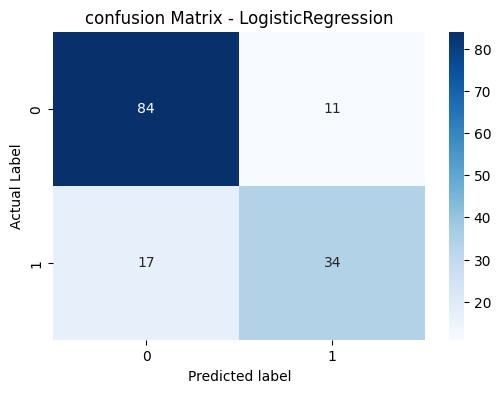

diabetics RandomForest Model confusion_matrix:
[[83 12]
 [21 30]]
diabetics DecisionTree Model confusion_matrix:
[[78 17]
 [17 34]]
diabetics KNN Model confusion_matrix:
[[79 16]
 [23 28]]
diabetics SVM Model confusion_matrix:

[[84 11]
 [15 36]]


In [106]:
#calculating model accuracy and other

print(f"diabetics LogisticRegression Model Accuracy: {accuracy_score(y_test_dia,dia_pred) : 2f}")
print(f"diabetics RandomForest Model Accuracy: {accuracy_score(y_test_dia,dia_Random_pred) : 2f}")
print(f"diabetics DecisionTree Model Accuracy: {accuracy_score(y_test_dia,dia_tree_pred) : 2f}")
print(f"diabetics KNN Model Accuracy: {accuracy_score(y_test_dia,dia_KNN_pred) : 2f}")
print(f"diabetics SVM Model Accuracy: {accuracy_score(y_test_dia,dia_svm_pred) : 2f}\n")

print(f"diabetics LogisticRegression Model Precision: {precision_score(y_test_dia,dia_pred) : 2f}")
print(f"diabetics RandomForest Model Precision: {precision_score(y_test_dia,dia_Random_pred) : 2f}")
print(f"diabetics DecisionTree Model Precision: {precision_score(y_test_dia,dia_tree_pred) : 2f}")
print(f"diabetics KNN Model Precision: {precision_score(y_test_dia,dia_KNN_pred) : 2f}")
print(f"diabetics SVM Model Precision: {precision_score(y_test_dia,dia_svm_pred) : 2f}\n")

print(f"diabetics LogisticRegression Model recall: {recall_score(y_test_dia,dia_pred) : 2f}")
print(f"diabetics RandomForest Model recall: {recall_score(y_test_dia,dia_Random_pred) : 2f}")
print(f"diabetics DecisionTree Model recall: {recall_score(y_test_dia,dia_tree_pred) : 2f}")
print(f"diabetics KNN Model recall: {recall_score(y_test_dia,dia_KNN_pred) : 2f}")
print(f"diabetics SVM Model recall: {recall_score(y_test_dia,dia_svm_pred) : 2f}\n")

print(f"diabetics LogisticRegression Model f1_score: {f1_score(y_test_dia,dia_pred) : 2f}")
print(f"diabetics RandomForest Model f1_score: {f1_score(y_test_dia,dia_Random_pred) : 2f}")
print(f"diabetics DecisionTree Model f1_score: {f1_score(y_test_dia,dia_tree_pred) : 2f}")
print(f"diabetics KNN Model f1_score: {f1_score(y_test_dia,dia_KNN_pred) : 2f}")
print(f"diabetics SVM Model f1_score: {f1_score(y_test_dia,dia_svm_pred) : 2f}\n")


fpr, tpr, _ = roc_curve(y_test_dia, dia_model.predict_proba(X_test_dia)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"LogisticRegression AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_dia, dia_Random_model.predict_proba(X_test_dia)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"RandomForest AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_dia, dia_tree_model.predict_proba(X_test_dia)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"Decision Tree AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_dia, dia_KNN_model.predict_proba(X_test_dia)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"KNN AUC: {roc_auc}\n\n")


print(f"diabetics LogisticRegression Model confusion_matrix:")
print(confusion_matrix(y_test_dia,dia_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_dia,dia_pred), annot=True, fmt="d", cmap= "Blues" ),
xticklabels=["No diabetics","diabetics"],
yticklabels=["No diabetics","diabetics"]
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.title("confusion Matrix - LogisticRegression")
plt.show()

print(f"diabetics RandomForest Model confusion_matrix:")
print(confusion_matrix(y_test_dia,dia_Random_pred))
print(f"diabetics DecisionTree Model confusion_matrix:")
print(confusion_matrix(y_test_dia,dia_tree_pred))
print(f"diabetics KNN Model confusion_matrix:")
print(confusion_matrix(y_test_dia,dia_KNN_pred))
print(f"diabetics SVM Model confusion_matrix:\n")
print(confusion_matrix(y_test_dia,dia_svm_pred))

Stroke LogisticRegression Model Accuracy:  0.939335

d:\ML_course_work\Flask_deployemet\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML_course_work\Flask_deployemet\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML_course_work\Flask_deployemet\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Stroke RandomForest Model Accuracy:  0.939335
Stroke DecisionTree Model Accuracy:  0.906067
Stroke KNN Model Accuracy:  0.935421
Stroke SVM Model Accuracy:  0.939335

Stroke LogisticRegression Model Precision:  0.000000
Stroke RandomForest Model Precision:  0.000000
Stroke DecisionTree Model Precision:  0.173077
Stroke KNN Model Precision:  0.166667
Stroke SVM Model Precision:  0.000000

Stroke LogisticRegression Model recall:  0.000000
Stroke RandomForest Model recall:  0.000000
Stroke DecisionTree Model recall:  0.145161
Stroke KNN Model recall:  0.016129
Stroke SVM Model recall:  0.000000

Stroke LogisticRegression Model f1_score:  0.000000
Stroke RandomForest Model f1_score:  0.000000
Stroke DecisionTree Model f1_score:  0.157895
Stroke KNN Model f1_score:  0.029412
Stroke SVM Model f1_score:  0.000000

LogisticRegression AUC: 0.5838541666666667
Decision Tree AUC: 0.5501848118279571
KNN AUC: 0.6658686155913979


Stroke LogisticRegression Model confusion_matrix:
[[960   0]
 [ 62   

d:\ML_course_work\Flask_deployemet\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


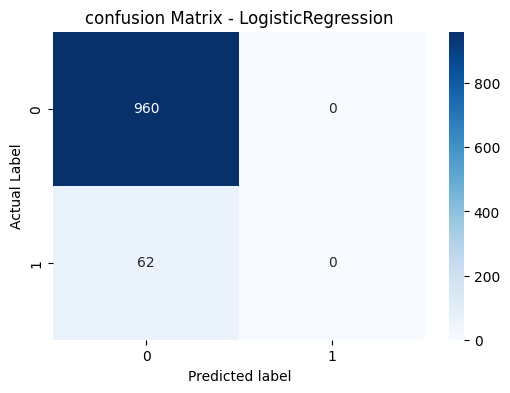

Stroke RandomForest Model confusion_matrix:
[[960   0]
 [ 62   0]]
Stroke DecisionTree Model confusion_matrix:
[[917  43]
 [ 53   9]]
Stroke KNN Model confusion_matrix:
[[955   5]
 [ 61   1]]
Stroke SVM Model confusion_matrix:

[[960   0]
 [ 62   0]]


In [107]:
#calculating model accuracy and other

print(f"Stroke LogisticRegression Model Accuracy: {accuracy_score(y_test_str,str_pred) : 2f}")
print(f"Stroke RandomForest Model Accuracy: {accuracy_score(y_test_str,str_Random_pred) : 2f}")
print(f"Stroke DecisionTree Model Accuracy: {accuracy_score(y_test_str,str_tree_pred) : 2f}")
print(f"Stroke KNN Model Accuracy: {accuracy_score(y_test_str,str_KNN_pred) : 2f}")
print(f"Stroke SVM Model Accuracy: {accuracy_score(y_test_str,str_svm_pred) : 2f}\n")

print(f"Stroke LogisticRegression Model Precision: {precision_score(y_test_str,str_pred) : 2f}")
print(f"Stroke RandomForest Model Precision: {precision_score(y_test_str,str_Random_pred) : 2f}")
print(f"Stroke DecisionTree Model Precision: {precision_score(y_test_str,str_tree_pred) : 2f}")
print(f"Stroke KNN Model Precision: {precision_score(y_test_str,str_KNN_pred) : 2f}")
print(f"Stroke SVM Model Precision: {precision_score(y_test_str,str_svm_pred) : 2f}\n")

print(f"Stroke LogisticRegression Model recall: {recall_score(y_test_str,str_pred) : 2f}")
print(f"Stroke RandomForest Model recall: {recall_score(y_test_str,str_Random_pred) : 2f}")
print(f"Stroke DecisionTree Model recall: {recall_score(y_test_str,str_tree_pred) : 2f}")
print(f"Stroke KNN Model recall: {recall_score(y_test_str,str_KNN_pred) : 2f}")
print(f"Stroke SVM Model recall: {recall_score(y_test_str,str_svm_pred) : 2f}\n")

print(f"Stroke LogisticRegression Model f1_score: {f1_score(y_test_str,str_pred) : 2f}")
print(f"Stroke RandomForest Model f1_score: {f1_score(y_test_str,str_Random_pred) : 2f}")
print(f"Stroke DecisionTree Model f1_score: {f1_score(y_test_str,str_tree_pred) : 2f}")
print(f"Stroke KNN Model f1_score: {f1_score(y_test_str,str_KNN_pred) : 2f}")
print(f"Stroke SVM Model f1_score: {f1_score(y_test_str,str_svm_pred) : 2f}\n")


fpr, tpr, _ = roc_curve(y_test_str, str_model.predict_proba(X_test_str)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"LogisticRegression AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_str, str_Random_model.predict_proba(X_test_str)[:, 1])
roc_auc = auc(fpr, tpr)
fpr, tpr, _ = roc_curve(y_test_str, str_tree_model.predict_proba(X_test_str)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"Decision Tree AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_str, str_KNN_model.predict_proba(X_test_str)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"KNN AUC: {roc_auc}\n\n")


print(f"Stroke LogisticRegression Model confusion_matrix:")
print(confusion_matrix(y_test_str,str_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_str,str_pred), annot=True, fmt="d", cmap= "Blues" ),
xticklabels=["No Stroke","Stroke"],
yticklabels=["No Stroke","Stroke"]
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.title("confusion Matrix - LogisticRegression")
plt.show()

print(f"Stroke RandomForest Model confusion_matrix:")
print(confusion_matrix(y_test_str,str_Random_pred))
print(f"Stroke DecisionTree Model confusion_matrix:")
print(confusion_matrix(y_test_str,str_tree_pred))
print(f"Stroke KNN Model confusion_matrix:")
print(confusion_matrix(y_test_str,str_KNN_pred))
print(f"Stroke SVM Model confusion_matrix:\n")
print(confusion_matrix(y_test_str,str_svm_pred))

d:\ML_course_work\Flask_deployemet\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


heart LogisticRegression Model Accuracy:  0.804878
heart RandomForest Model Accuracy:  0.985366
heart DecisionTree Model Accuracy:  0.985366
heart KNN Model Accuracy:  0.731707
heart SVM Model Accuracy:  0.800000

heart LogisticRegression Model Precision:  0.773913
heart RandomForest Model Precision:  1.000000
heart DecisionTree Model Precision:  1.000000
heart KNN Model Precision:  0.730769
heart SVM Model Precision:  0.776786

heart LogisticRegression Model recall:  0.864078
heart RandomForest Model recall:  0.970874
heart DecisionTree Model recall:  0.970874
heart KNN Model recall:  0.737864
heart SVM Model recall:  0.844660

heart LogisticRegression Model f1_score:  0.816514
heart RandomForest Model f1_score:  0.985222
heart DecisionTree Model f1_score:  0.985222
heart KNN Model f1_score:  0.734300
heart SVM Model f1_score:  0.809302

LogisticRegression AUC: 0.6235484485056159
RandomForest AUC: 1.0
Decision Tree AUC: 0.9854368932038835
KNN AUC: 0.8612221587664192


heart LogisticRe

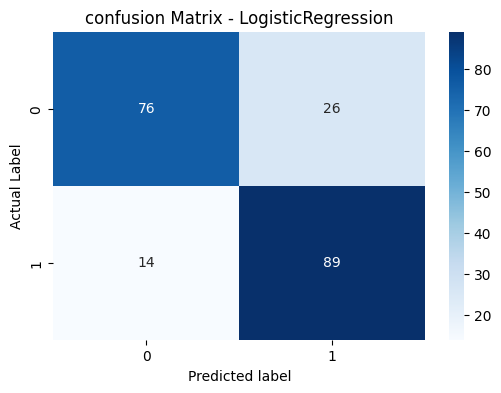

heart RandomForest Model confusion_matrix:
[[102   0]
 [  3 100]]
heart DecisionTree Model confusion_matrix:
[[102   0]
 [  3 100]]
heart KNN Model confusion_matrix:
[[74 28]
 [27 76]]
heart SVM Model confusion_matrix:

[[77 25]
 [16 87]]


In [108]:
#calculating model accuracy and other

print(f"heart LogisticRegression Model Accuracy: {accuracy_score(y_test_heart,heart_pred) : 2f}")
print(f"heart RandomForest Model Accuracy: {accuracy_score(y_test_heart,heart_Random_pred) : 2f}")
print(f"heart DecisionTree Model Accuracy: {accuracy_score(y_test_heart,heart_tree_pred) : 2f}")
print(f"heart KNN Model Accuracy: {accuracy_score(y_test_heart,heart_KNN_pred) : 2f}")
print(f"heart SVM Model Accuracy: {accuracy_score(y_test_heart,heart_svm_pred) : 2f}\n")

print(f"heart LogisticRegression Model Precision: {precision_score(y_test_heart,heart_pred) : 2f}")
print(f"heart RandomForest Model Precision: {precision_score(y_test_heart,heart_Random_pred) : 2f}")
print(f"heart DecisionTree Model Precision: {precision_score(y_test_heart,heart_tree_pred) : 2f}")
print(f"heart KNN Model Precision: {precision_score(y_test_heart,heart_KNN_pred) : 2f}")
print(f"heart SVM Model Precision: {precision_score(y_test_heart,heart_svm_pred) : 2f}\n")

print(f"heart LogisticRegression Model recall: {recall_score(y_test_heart,heart_pred) : 2f}")
print(f"heart RandomForest Model recall: {recall_score(y_test_heart,heart_Random_pred) : 2f}")
print(f"heart DecisionTree Model recall: {recall_score(y_test_heart,heart_tree_pred) : 2f}")
print(f"heart KNN Model recall: {recall_score(y_test_heart,heart_KNN_pred) : 2f}")
print(f"heart SVM Model recall: {recall_score(y_test_heart,heart_svm_pred) : 2f}\n")

print(f"heart LogisticRegression Model f1_score: {f1_score(y_test_heart,heart_pred) : 2f}")
print(f"heart RandomForest Model f1_score: {f1_score(y_test_heart,heart_Random_pred) : 2f}")
print(f"heart DecisionTree Model f1_score: {f1_score(y_test_heart,heart_tree_pred) : 2f}")
print(f"heart KNN Model f1_score: {f1_score(y_test_heart,heart_KNN_pred) : 2f}")
print(f"heart SVM Model f1_score: {f1_score(y_test_heart,heart_svm_pred) : 2f}\n")


fpr, tpr, _ = roc_curve(y_test_heart, heart_model.predict_proba(X_test_heart)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"LogisticRegression AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_heart, heart_Random_model.predict_proba(X_test_heart)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"RandomForest AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_heart, heart_tree_model.predict_proba(X_test_heart)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"Decision Tree AUC: {roc_auc}")
fpr, tpr, _ = roc_curve(y_test_heart, heart_KNN_model.predict_proba(X_test_heart)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"KNN AUC: {roc_auc}\n\n")


print(f"heart LogisticRegression Model confusion_matrix:")
print(confusion_matrix(y_test_heart,heart_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_heart,heart_pred), annot=True, fmt="d", cmap= "Blues" ),
xticklabels=["No heart disease","heart disease"],
yticklabels=["No heart disease","heart disease"]
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.title("confusion Matrix - LogisticRegression")
plt.show()

print(f"heart RandomForest Model confusion_matrix:")
print(confusion_matrix(y_test_heart,heart_Random_pred))
print(f"heart DecisionTree Model confusion_matrix:")
print(confusion_matrix(y_test_heart,heart_tree_pred))
print(f"heart KNN Model confusion_matrix:")
print(confusion_matrix(y_test_heart,heart_KNN_pred))
print(f"heart SVM Model confusion_matrix:\n")
print(confusion_matrix(y_test_heart,heart_svm_pred))

In [109]:
#Best models choosen
#ckd = RandomForest & Decision Tree (Accuracy = 1)
#Diabets = SVM & RandomForest(Accuracy = 0.8)
#Stroke = Decision Tree (0.911937)
#Heart disease (Accuracy = 1)

In [110]:
#HyperTuning choosen models
#Stroke Decision tree 

parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','log2',None]
}

cv = GridSearchCV(str_tree_model,param_grid = parameter,cv = 5)
cv.fit(X_train_str,y_train_str)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [111]:
print(cv.score(X_train_str,y_train_str))

0.9542563600782779


In [112]:
# Cost-complexity pruning (Post-pruning)
path = str_tree_model.cost_complexity_pruning_path(X_train_str,y_train_str)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a series of decision trees with different alpha values
pruned_models = []
for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha)
    pruned_model.fit(X_train_str,y_train_str)
    pruned_models.append(pruned_model)

# Find the model with the best accuracy on test data
best_accuracy = 0
best_pruned_model = None
for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_train_str,y_train_str)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model
# Model Accuracy after pruning
accuracy_after_pruning = best_pruned_model.score(X_train_str,y_train_str)
print("Accuracy after pruning:", accuracy_after_pruning)


Accuracy after pruning: 1.0


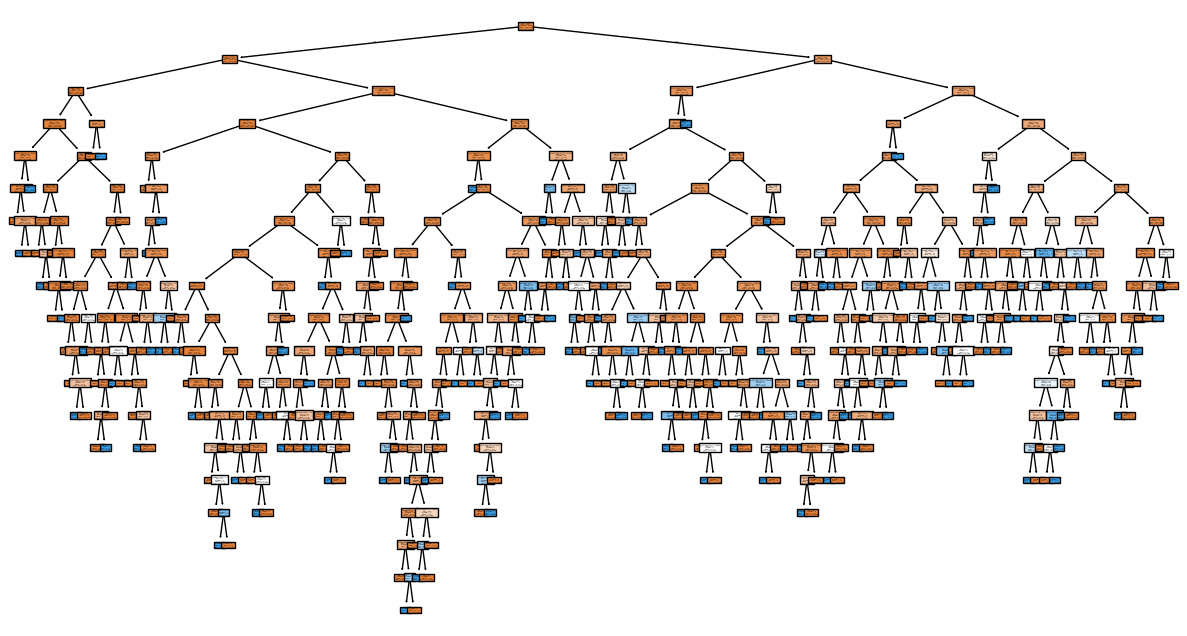

In [113]:
#draw the tree
plt.figure(figsize=(15,8))
plot_tree(best_pruned_model,feature_names=X_train_str.columns, class_names=['Not Stroke','Stroke'],filled=True)
plt.show()

In [114]:
#RandomForest Hyperturne for diabet

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_dia, y_train_dia)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test_dia)
print(y_best_pred)

accuracy_after_hyper = best_model.score(X_train_dia,y_train_dia)
print("Accuracy after Hyper:", accuracy_after_hyper)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.7663424697907456
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0]
Accuracy after Hyper: 0.9759450171821306


Accuracy after Hyper: 0.9759450171821306
Stroke DecisionTree Model Precision:  0.187500
Stroke DecisionTree Model recall:  0.145161
Stroke DecisionTree Model f1_score:  0.163636
Decision Tree AUC: 0.5522681451612903
Stroke DecisionTree Model confusion_matrix:
[[921  39]
 [ 53   9]]


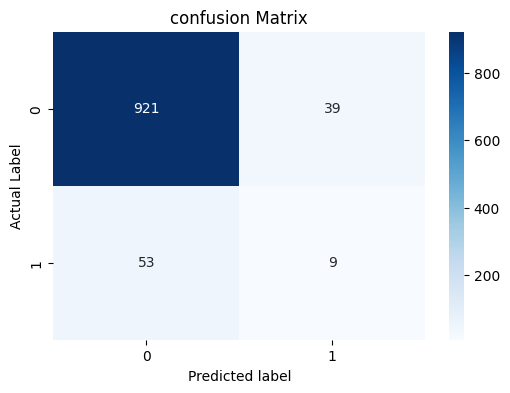

Text(0.5, 1.0, 'Roc curve for Decision tree')

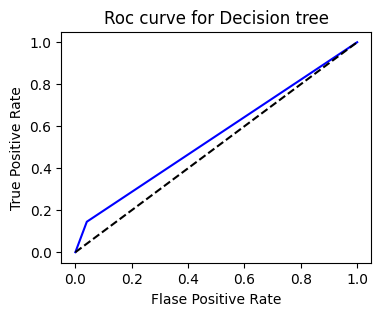

In [115]:
#Reevaluate model after tunning
y_pred_tunned = best_pruned_model.predict(X_test_str)

print("Accuracy after Hyper:", accuracy_after_hyper)
print(f"Stroke DecisionTree Model Precision: {precision_score(y_test_str,y_pred_tunned) : 2f}")
print(f"Stroke DecisionTree Model recall: {recall_score(y_test_str,y_pred_tunned) : 2f}")
print(f"Stroke DecisionTree Model f1_score: {f1_score(y_test_str,y_pred_tunned) : 2f}")
fpr, tpr, _ = roc_curve(y_test_str, best_pruned_model.predict_proba(X_test_str)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"Decision Tree AUC: {roc_auc}")
print(f"Stroke DecisionTree Model confusion_matrix:")
print(confusion_matrix(y_test_str,y_pred_tunned))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_str,y_pred_tunned), annot=True, fmt="d", cmap= "Blues" ),
xticklabels=["No Stroke","Stroke"],
yticklabels=["No Stroke","Stroke"]
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.title("confusion Matrix")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(fpr,tpr,color="blue",label="ROC Curve(AWC = (roc_awc:2f))" )
plt.plot([0,1],[0,1],'k--',label="Random Guess (AWC=0.5)")#Diagonal References Line
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curve for Decision tree")

diabetics RandomForest Model Accuracy:  0.821918
diabetics RandomForest Model Precision:  0.765957
diabetics RandomForest Model recall:  0.705882
diabetics RandomForest Model f1_score:  0.734694
RandomForest AUC: 0.8687306501547988
diabetics RandomForest Model confusion_matrix:
[[84 11]
 [15 36]]


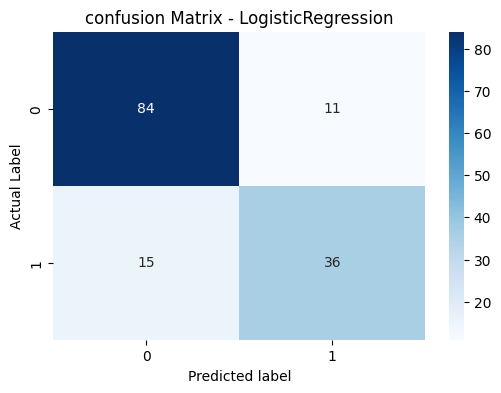

Text(0.5, 1.0, 'Roc curve for Random Forest')

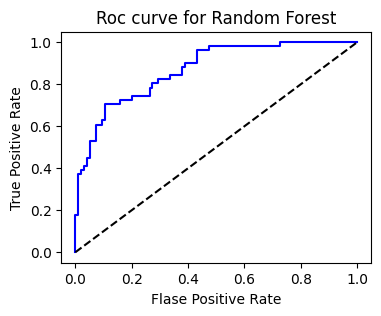

In [116]:



print(f"diabetics RandomForest Model Accuracy: {accuracy_score(y_test_dia,y_best_pred) : 2f}")
print(f"diabetics RandomForest Model Precision: {precision_score(y_test_dia,y_best_pred) : 2f}")
print(f"diabetics RandomForest Model recall: {recall_score(y_test_dia,y_best_pred) : 2f}")
print(f"diabetics RandomForest Model f1_score: {f1_score(y_test_dia,y_best_pred) : 2f}")
fpr, tpr, _ = roc_curve(y_test_dia, best_model.predict_proba(X_test_dia)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"RandomForest AUC: {roc_auc}")

print(f"diabetics RandomForest Model confusion_matrix:")
print(confusion_matrix(y_test_dia,y_best_pred))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_dia,y_best_pred), annot=True, fmt="d", cmap= "Blues" ),
xticklabels=["No diabetics","diabetics"],
yticklabels=["No diabetics","diabetics"]
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.title("confusion Matrix - LogisticRegression")
plt.show()




plt.figure(figsize=(4,3))
plt.plot(fpr,tpr,color="blue",label="ROC Curve(AWC = (roc_awc:2f))" )
plt.plot([0,1],[0,1],'k--',label="Random Guess (AWC=0.5)")#Diagonal References Line
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curve for Random Forest")


In [117]:
#saving the models
#ckd dataset
joblib.dump(ckd_model,'ckd_LogisticRegression_model.pkl')
joblib.dump(ckd_Random_model,'ckd_Random_model.pkl')
joblib.dump(ckd_tree_model,'ckd_tree_model.pkl')
joblib.dump(ckd_KNN_model,'ckd_KNN_model.pkl')
joblib.dump(ckd_svm_model,'ckd_svm_model.pkl')

#diabetics dataset
joblib.dump(dia_model,'dia_LogisticRegression_model.pkl')
joblib.dump(best_model,'dia_RandomForest_model.pkl')
joblib.dump(dia_tree_model,'dia_tree_model.pkl')
joblib.dump(dia_KNN_model,'dia_KNN_model.pkl')
joblib.dump(dia_svm_model,'dia_svm_model.pkl')

#Stroke dataset
joblib.dump(str_model,'str_LogisticRegression_model.pkl')
joblib.dump(str_Random_model,'str_Random_model.pkl')
joblib.dump(best_pruned_model,'str_tree_model.pkl')
joblib.dump(str_KNN_model,'str_KNN_model.pkl')
joblib.dump(str_svm_model,'str_svm_model.pkl')

#Heart Disease dataset
joblib.dump(heart_model,'heart_LogisticRegression_model.pkl')
joblib.dump(heart_Random_model,'heart_Random_model.pkl')
joblib.dump(heart_tree_model,'heart_tree_model.pkl')
joblib.dump(heart_KNN_model,'heart_KNN_model.pkl')
joblib.dump(heart_svm_model,'heart_svm_model.pkl')

['heart_svm_model.pkl']